<a href="https://colab.research.google.com/github/alfinmaulani/skripsi/blob/master/3ekstraksi_dan_klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade scikit-learn
import numpy as np
import pandas as pd
import io
import os
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import gensim
import ast

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

load korpus

In [2]:
url1 = '/content/drive/MyDrive/dataisear(preputama).csv'
url2 = '/content/drive/MyDrive/dataisear(preptambah).csv'
df = pd.read_csv(url1)

In [3]:
temp=[]
for senten in df.dokumen:
  temp.append(ast.literal_eval(senten))
df.dokumen=temp

pilih model

In [4]:
pakai_model=2

load model

In [5]:
if pakai_model == 1:#load model word2vec
  from gensim.models import word2vec
  model = gensim.models.word2vec.Word2Vec.load('/content/drive/MyDrive/korpuswiki600M(preputama).w2v')
elif pakai_model == 2:#load model glove
  !pip install glove-python-binary
  from glove import Glove
  from glove import Corpus
  model=Glove.load('/content/drive/MyDrive/korpuswiki600M(preputama).glove')

     |████████████████████████████████| 948 kB 26.8 MB/s 


cek model word2vec

In [ ]:
model.wv.vectors.shape

(1263138, 100)

In [ ]:
model.wv["moment"]

cek model glove

In [6]:
model.word_vectors.shape

(7961, 100)

In [ ]:
model.word_vectors[model.dictionary['moment']]

average base ekstraksi fitur

In [10]:
import array
ekstrak=[]
temp=array.array('i',(0,)*100)

if pakai_model == 1:
  for senten in df.dokumen:
    for word in senten:
      temp=np.add(temp,model.wv[word])
    temp=temp/len(senten)
    ekstrak.append(temp)

elif pakai_model == 2:
  for senten in df.dokumen:
    for word in senten:
      temp=np.add(temp,model.word_vectors[model.dictionary[word]])
    temp=temp/len(senten)
    ekstrak.append(temp)

has_vec=ekstrak

In [11]:
X=has_vec
y=df.emosi
print(np.shape(X))
print(np.shape(y))
# print(X)
# print(y)

(5395, 100)
(5395,)


klasifikasi svm

In [12]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support

In [13]:
def klasifikasi(krnl):
  clf = svm.SVC(kernel=krnl, decision_function_shape='ovr')
  y_pred = cross_val_predict(clf, X, y, cv=10)
  ConfusionMatrixDisplay.from_predictions(y, y_pred)
  plt.show()
  print(accuracy_score(y, y_pred))
  print(precision_recall_fscore_support(y, y_pred, average='macro'))

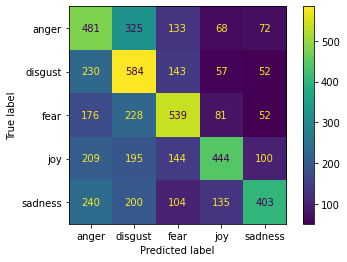

0.45430954587581096
(0.48148229310396584, 0.45472134380108126, 0.4565367917869506, None)


In [14]:
klasifikasi('poly')

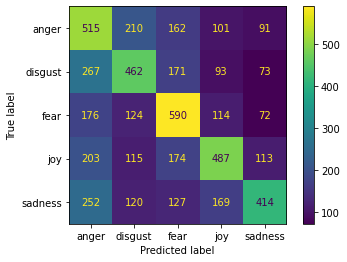

0.45746061167747915
(0.46847785416906157, 0.45752245308612505, 0.45790229554444084, None)


In [15]:
klasifikasi('rbf')

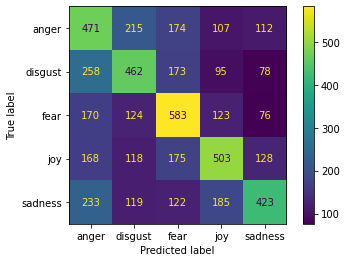

0.45264133456904543
(0.4593659591809677, 0.45265962700486834, 0.4529663387340155, None)


In [16]:
klasifikasi('linear')